# SMS Spam Collection
This is a text corpus of over 5,500 English SMS messages with ~13% labeled as spam. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate. 

Not sure where to begin? Scroll to the bottom to find challenges!


# Mise en oeuvre du projet 

Dans ce projet, il s'agit de concevoir un outil d'identification automatique des messages afin de déterminer si un message SMS est un spam (indésirable) ou un message légitime (ham). Pour cela, plusieurs étapes seront mises en œuvre :

### Analyse et exploration des données

L’objectif initial est de comprendre les différences entre les messages spam et les messages normaux. Cela passe par :

- Le nettoyage des messages (suppression des caractères inutiles, mise en minuscule, etc.).

- L’identification des mots les plus fréquents dans les spams par rapport aux messages normaux.

- La visualisation (par exemple avec des nuages de mots) pour mieux interpréter les données.

### Analyse statistique

Une analyse de fréquence permettra de mettre en évidence :

- Les mots ou expressions typiques des spams (ex. : "free", "win", "urgent").

- Les termes plus présents dans les messages normaux.
Cela aide à comprendre les indices textuels sur lesquels un modèle peut s’appuyer pour classer un message.

### Construction du modèle de machine learning

Une fois les données nettoyées et vectorisées (converties en données numériques), un modèle d’apprentissage automatique est entraîné pour :

- Apprendre à différencier un message spam d’un message normal à partir des exemples fournis.

- Tester sa capacité à prédire correctement la catégorie d’un nouveau message.

In [15]:
# Chargement et exploration des données

import pandas as pd
spam = pd.read_csv("SMSSpamCollection.csv", header=None)
print(spam.shape)
spam.head(100)

(5572, 2)


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,spam,Your free ringtone is waiting to be collected....
96,ham,Watching telugu movie..wat abt u?
97,ham,i see. When we finish we have loads of loans t...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


In [16]:
spam.columns=['label','text']

spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
spam.isnull().sum()

label    0
text     0
dtype: int64

<Axes: title={'center': 'Repartition des classes'}, xlabel='label'>

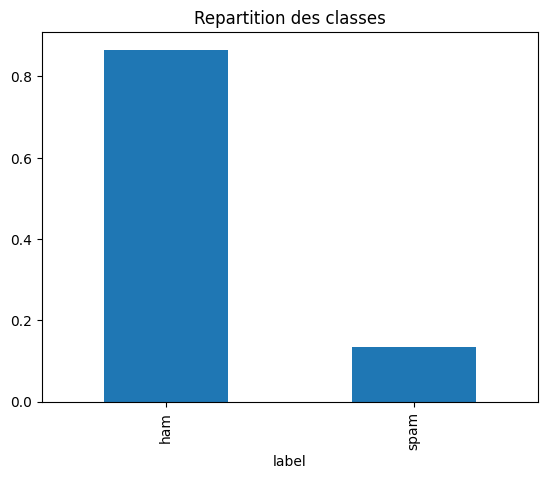

In [19]:
# Analyse exploratoire rapide

spam['label'].value_counts(normalize=True).plot(kind='bar', title="Repartition des classes")

In [20]:
# traitement des données

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lematizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to C:\Users\Admin
[nltk_data]     Stagiaire\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Admin
[nltk_data]     Stagiaire\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Admin
[nltk_data]     Stagiaire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:

def clean_text(txt):
    txt=txt.lower()
    txt=re.sub(r'\W+',' ', txt)
    words=txt.split()
    words=[lematizer.lemmatize(word, pos='v') for word in words if word not in stop_words]
    return ' '.join(words)

spam['messg']=spam['text'].apply(clean_text)

spam.head()
   

,label,text,messg
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though


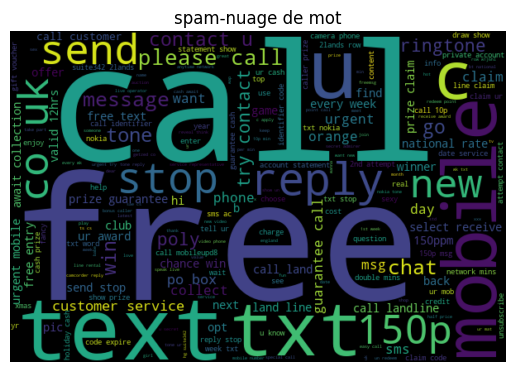

In [22]:
# Nuage de mots

import matplotlib.pyplot as plt
from wordcloud import WordCloud

sm_word=' '.join(spam[spam['label']=='spam']['messg'])

WdCl=WordCloud(width=600, height=400).generate(sm_word)

plt.imshow(WdCl, interpolation='bilinear')
plt.axis("off")
plt.title("spam-nuage de mot")
plt.show()


In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer

verctorizer = TfidfVectorizer()

X=verctorizer.fit_transform(spam['messg'])
y=spam['label'].map({'ham':0,'spam':1})

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model=MultinomialNB()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [26]:
#evaluation du model

print("classification Repport:\n", classification_report(y_test,y_pred))
print("confusion Matrix: \n", confusion_matrix(y_test, y_pred))

classification Repport:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

confusion Matrix: 
 [[966   0]
 [ 36 113]]


In [27]:
# comparaison avec d'autre models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models={
    "Naive Bayes": MultinomialNB()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))


Naive Bayes
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [28]:
# sauvegard du model

import joblib 

joblib.dump(models, 'naive_bayes.pkl')
joblib.dump(verctorizer, 'vectorizer.pkl')


['vectorizer.pkl']